# IS362 Fall 2019 Week13 Assignment - Koon Tse
### Assignment – Preprocessing Data for scikit-learn

Very often, we’re tasked with taking data in one form and transforming it for easier downstream analysis. In this assignment, you’ll use what you’ve learned in the course to prepare data for predictive analysis in Project 4.

Mushrooms Dataset. A famous—if slightly moldy—dataset about mushrooms can be found in the UCI repository here: https://archive.ics.uci.edu/ml/datasets/Mushroom. The fact that this is such a well-known dataset in the data science community has made it a good dataset to use for comparative benchmarking. For example, if someone was working to build a better decision tree algorithm (or other predictive classifier) to analyze categorical data, this dataset could be useful. In Project 4, we’ll use scikit-learn to answer the question, “Which other attribute or attributes are the best predictors of whether a particular mushroom is poisonous or edible?”

Your assignment is to: 

#### 1. First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!

#### 2. Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing. (https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data)

#### 3. Add meaningful names for each column. 

#### 4. Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics. 

#### 5. Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.

#### 6. Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous. 

Data are downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/

#### The columns that I have selected are selected from the following (https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names) and they are:
#### Classes:  edible=e, poisonous=p
#### Odor:  almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
#### Habitat:  grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

##### Importing libraries.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

##### Create dataframe  with the class, odor and habitat column.  Associate each column with a meaningful header name and display the top 10 rows. </b>

In [6]:
mushroom_dataframe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',sep = ',',header = None,usecols=[0, 5, 22],names = ['Mushroom_Class', 'Mushroom_Odor', 'Mushroom_Habitat'])
mushroom_dataframe.head(10) 

,Mushroom_Class,Mushroom_Odor,Mushroom_Habitat
0,p,p,u
1,e,a,g
2,e,l,m
3,p,p,u
4,e,n,g
5,e,a,g
6,e,a,m
7,e,l,m
8,p,p,g
9,e,a,m


#### Replace the codes used in the data with numeric values

In [7]:
mushroom_dataframe.replace(to_replace={'Mushroom_Class':{'e': 0, 'p': 1}}, inplace = True)
mushroom_dataframe.replace(to_replace={'Mushroom_Odor':{'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}}, inplace = True)
mushroom_dataframe.replace(to_replace={'Mushroom_Habitat':{'g':0, 'l':1, 'm':2, 'p':3, 'u':4, 'w':5, 'd':6}}, inplace = True)
mushroom_dataframe.head(10)

,Mushroom_Class,Mushroom_Odor,Mushroom_Habitat
0,1,7,4
1,0,0,0
2,0,1,2
3,1,7,4
4,0,6,0
5,0,0,0
6,0,0,2
7,0,1,2
8,1,7,0
9,0,0,2


#### Perform exploratory data analysis by counting the total type of edible and poisonous mushroom class.
#### There are 4208 edible mushroom vs. 3916 poisonous mushrooms.

In [8]:
mushroom_total = mushroom_dataframe['Mushroom_Class'].value_counts()
mushroom_total

0    4208
1    3916
Name: Mushroom_Class, dtype: int64

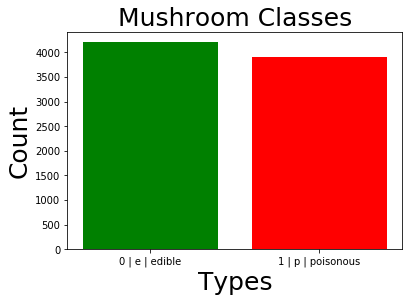

In [67]:
mushroom_class_type = ['0 | e | edible', '1 | p | poisonous']
y_pos = np.arange(len(mushroom_class_type))
data = mushroom_total
plt.bar(y_pos, data, color=['green','red'])
plt.xticks(y_pos, mushroom_class_type)
plt.xlabel('Types', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
plt.title('Mushroom Classes', fontsize = 25)
plt.show()

#### Perform exploratory data analysis by counting the total types of odor of the mushroom.

Text(0.5,1,'Mushroom Classes and Odors')

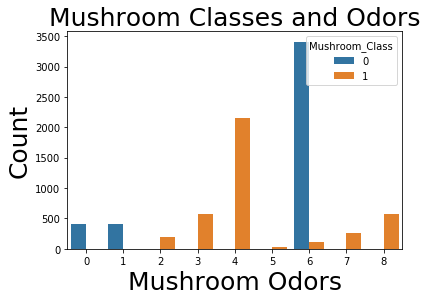

In [65]:
mush_odor = sns.countplot(x = 'Mushroom_Odor', data = mushroom_dataframe, hue='Mushroom_Class')
plt.xlabel('Mushroom Odors', size = 25)
plt.ylabel('Count', size = 25)
plt.xticks(rotation = 0)
plt.title('Mushroom Classes and Odors', fontsize = 25)

#### Perform exploratory data analysis on mushroom habitat

Text(0,0.5,'Mushroom Habitat')

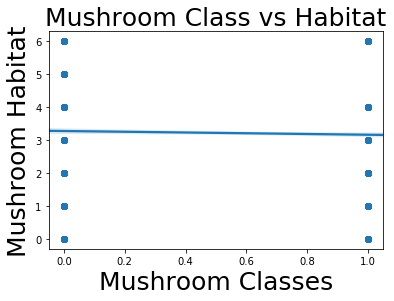

In [77]:
class_vs_hab = sns.regplot(x = 'Mushroom_Class', y = 'Mushroom_Habitat', data = mushroom_dataframe)
plt.title('Mushroom Class vs Habitat', fontsize = 25)
plt.xlabel('Mushroom Classes', size = 25)
plt.ylabel('Mushroom Habitat', size = 25)

Based on the above exploratory analysis, the edible class of mushroom edge a slightly higher than the poisonous class.